# <u>Understanding Police Shootings in America</u>

### Project Goal:
  ##### The purpose for this project is to create a generalized pattern that will enhance our understanding of the relations of race, gun violence and police shootings in the United States through Data Science statistical analysis. 

__Data Period:__  JAN 02, 2015 to JUN 13, 2020

__Data Source:__ 
    https://www.kaggle.com/code/gauravduttakiit/understanding-us-police-shootings/data?select=shootings.csv

  In the recent past, police shootings in America has gained much unanticipated media coverage and for the most part has sparked outrage (<i>a times violent protests</i>) not only here in America, but to all the 7 continents of the world. Although the more memorable incident with the killing of unarmed citizen, George Floyd, in the State of Minnesota in May of 2020 did not involve a discharge of police weapon, this was a catalyst in the scrutiny of police practices including incidents involving shootings. 
  
  This project however, the goal is to examine incidents involving fetal police shootings involving suspected <i>gun-violence</i>  in the United States and gain insight in police practices. I will caution that although this subject is important, and to many Americans- very sensitive, this project is not exhaustive in covering this subject exhaustively. In fact, more and more work is required on this topic. The project followed data science pipeline  approach Planning >> Acquire >> Prepare >> Explore >> Model >> Delivery.

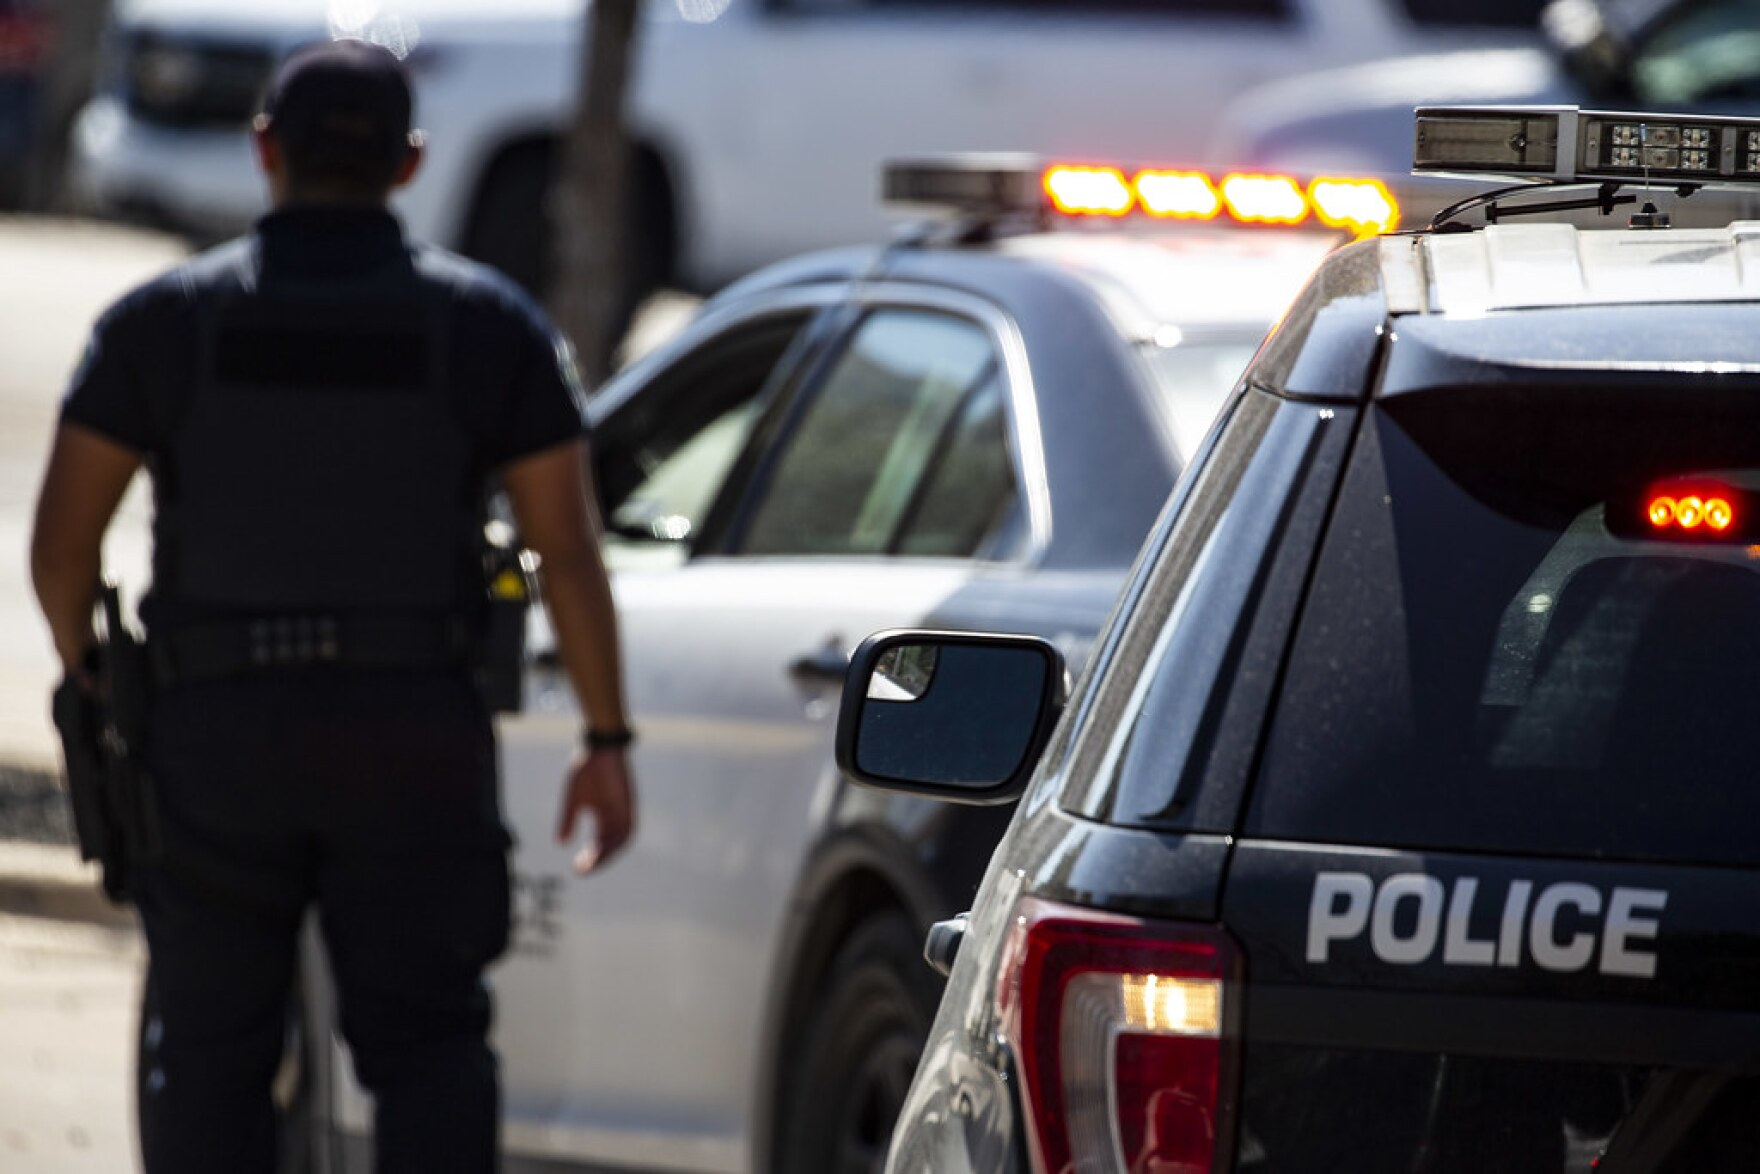

In [1]:
from IPython import display
display.Image("./police.jpeg")

#### Import Libraries

In [56]:
from import_libraries import plt, tabulate, stats, alpha

# Planning 
Understand the project requirements and rubric as outlined in Code-Up Curriculum.

Stakeholders: Public, understand police shootings in the United States.
##### Timeline:
__Day 1:__ Friday, April 22nd
   - 1 Hour - Select a dataset / project to work on
   - 1 Hour - Project Planning
   - 2 hours - Data Acquired and Prepped
   - 2.5 hours - Initial EDA
   
__Day 2:__ Monday, April 25th
   - 1 hour - Summarize your findings, perform next steps indicated from exploration, and wrap up any work needed prior to modeling.
   - 2 hours - Modeling
   - 2.5 hours - Iteration 2
   - 1 hour - Prepare to deliver
   
__Day 3:__ Tuesday, April 26th
   - Further MVP Iteration
   - Project Summary/Write-up
   
__Day 4:__ Friday, April 27th
   - Peer Review

# Acquire Data

  Data acquired from open-source website www.kaggle.com through the link https://www.kaggle.com/code/gauravduttakiit/understanding-us-police-shootings/data?select=shootings.csv. A comma separated was directly downloaded from the Internet and saved on local machine under 'shootings.csv' file. Should you wish to replicate this project, get a copy through discussed method and save a copy to your local computer. In the future, I do intent to implement automated function that will download the file when called from this phase of the pipeline. Specific module responsible for saving the file is called acquire.py and had a user-built module called 'get_police_shootings_data'. 

In [111]:
# Call to the explore prepare & spit function
train, validate, test = import_libraries.prepare_police_shootings_data()
train.shape, validate.shape, test.shape

((2739, 27), (1175, 27), (979, 27))

# Prepare Data

  This project has the 'prepare.py' are necessary in the data preparations prior to exploration phase. Functions contained in this modules are:
  - 'encode_data()' that takes in a df and encodes necessary categorical columns numeric values for analysis. 
  - 'prepare_police_shootings_data()'. This function is responsible for:
      - Acquiring data-frame from acquire.py module 
      - Drop unnecessary columns 'id' & 'name'. (Suspects names maybe important on other situations but for purpose of this project, race was major importance).
      - Drop any duplicated rows, if any whatsoever, of data.
      - Reset main data-frame index. 
      - Create new columns such as date with month, year, day, week, quoter and gun_violence. 
      - The function calls the encode function to one-hot impute categorical data into numerical.
      - Set date column into date-time format and index it.
      - Since the data-frame contained no null values, any nulls that are created will be filled with value 1.
      - Lastly, the function created split of train, validate, and test according to the following ratios:
          - Train: 55%
          - Validate: 24%
          - Test: 20%

#### Explore DataFrame

In [23]:
# Preview Explore data
train.head(2)

,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,...,gun_violence,enc_sign_mentally_ill,enc_manner_death,enc_arm_category,enc_armed,enc_attack_level,enc_flee,enc_gender,enc_body_camera,enc_race
date,,,,,,,,,,,,,,,,,,,,,
2018-08-01,shot,gun,41.0,M,Black,Sussex County,VA,False,attack,Car,...,1,1.0,0,10.0,5.0,1,2.0,1,1.0,1.0
2017-08-08,shot,gun,17.0,M,Black,Dalton,IL,False,other,Other,...,1,1.0,0,10.0,5.0,2,1.0,1,1.0,1.0


#### Model DataFrame

In [24]:
# Call to the modeling data
X_train, X_validate, X_test = import_libraries.prepare_modeling_data(target = 'gun_violence',seed = 123)

In [25]:
# Preview modeling data
X_train.head(2)

,age,year,month,day,week,quarter,gun_violence,enc_sign_mentally_ill,enc_manner_death,enc_arm_category,enc_armed,enc_attack_level,enc_flee,enc_gender,enc_body_camera,enc_race
date,,,,,,,,,,,,,,,,
2018-08-01,41.0,2018,8,1,31,3,1,1.0,0,10.0,5.0,1,2.0,1,1.0,1.0
2017-08-08,17.0,2017,8,8,32,3,1,1.0,0,10.0,5.0,2,1.0,1,1.0,1.0


# Explore Data
### What is the data-story?
#### Project questions of interest:
- (1). Which crime category accounts for most gun related shootings in America?
- (2). Is there a relationship between race and gun violence?
- (3). With gun violence, is there a relationship between races and police level of lethal force (threat level)?
- (4). With gun violence, does the manner of death differ between races? 
- (5). With gun violence, does fleeing suspects likely to be shot based on race?


#### Overall population Summary

In [134]:
train.race.value_counts()

White       1389
Black        737
Hispanic     481
Asian         56
Native        51
Other         25
Name: race, dtype: int64

<AxesSubplot:>

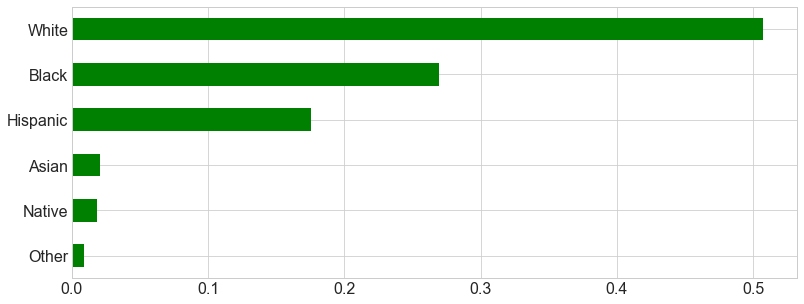

In [133]:
train.race.value_counts(normalize = True).sort_values().plot(kind = 'barh', color = 'g')

-----------------
### (Q- i). Most frequent shooting-related crime category

> #### Gun Violence is the most frequent crime category of suspects shot by police in United States during the period 2014 to 2020. This crime category accounted for 56.37% of all crimes.


In [26]:
# Violence Catergory
train.arms_category.value_counts()

Guns                     1544
Sharp objects             464
Unknown                   239
Unarmed                   203
Other unusual objects     104
Vehicles                   69
Blunt instruments          68
Multiple                   22
Electrical devices         13
Piercing objects           11
Explosives                  2
Name: arms_category, dtype: int64

#### Mean 6 month average gun violence, other crimes, race, and suspect flee tendency from 2015 - 2020

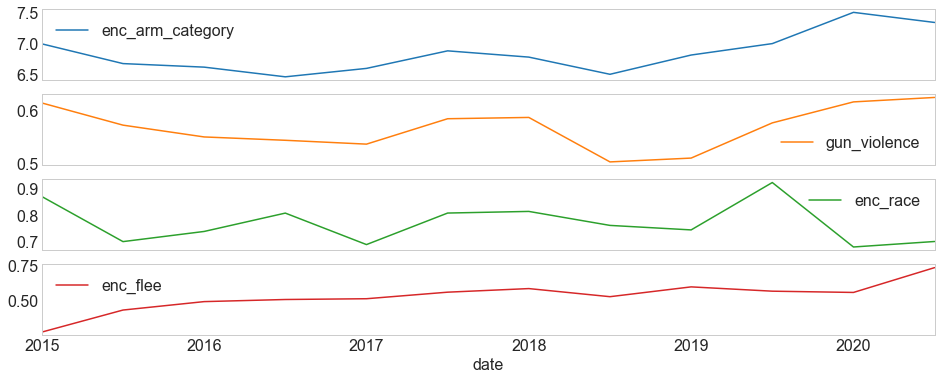

In [27]:
# Time series analysis of gun violence, other crimes categories and race over time (Mean 6 months average)

train[["enc_arm_category", "gun_violence", 'enc_race', 'enc_flee']].resample("6M").mean().plot(grid = False, subplots = True, figsize=(16,6))
None

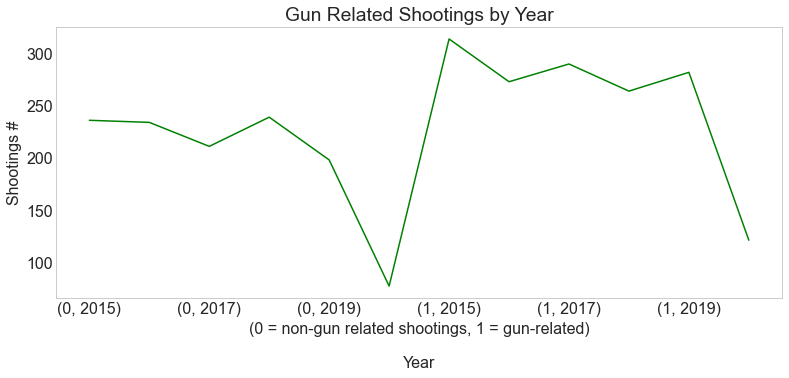

In [28]:
# Gun Violence over the years

train.groupby(['gun_violence', 'year'] ).size().plot(kind = 'line', title = ('Gun Related Shootings by Year'), 
                                                     color = 'green', grid = False)
plt.ylabel('Shootings #')
plt.xlabel('(0 = non-gun related shootings, 1 = gun-related)\n\nYear')
plt.show()

-----------------
### (Q- ii). Is there a relationship between race and gun violence?

> #### Contrary to popular mainstream medias in America, data reveals Caucasian Americans are most shot group in gun-related incidents accounting to 29.39% of all gun related incidents. 

In [29]:
data = [["Caucasians", 29.39,'%'],
         ["Black American",16.42,'%'],
         ["Hispanics American",8.40,'%'],
         ["Native American",1.06,'%'],
         ["Asian American",0.73,'%'],
         ["Other Ethnics",0.37,'%']]
table = tabulate.tabulate(data, tablefmt='html')
table

Caucasians,29.39,%
Black American,16.42,%
Hispanics American,8.4,%
Native American,1.06,%
Asian American,0.73,%
Other Ethnics,0.37,%


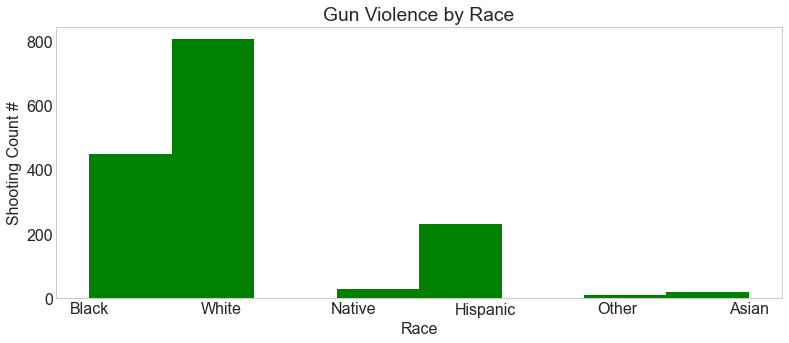

In [30]:
# Gun Violence Attack to police
gun_violence_set = train[train.arms_category == 'Guns']
non_gun_violence_set = train[train.arms_category != 'Guns']

gun_violence_set.race.hist(color = 'green', bins = 8, grid = False)
plt.title('Gun Violence by Race')
plt.xlabel('Race')
plt.ylabel('Shooting Count #')
plt.show()

#### Statistically evaluate the hypothesis

In [36]:
H0 = 'Gun violence is independent of race'
H1 = 'Gun violence is NOT independent of race'

n = train.shape[0]
gun_violence_percentage = train.gun_violence.value_counts() /n 
race_gun_violence = train.race.value_counts() / n
# Observed values
observed = pd.crosstab(train.race, train.gun_violence)
# Expected
expected = pd.DataFrame()
for gun_violence_group, t_prop in gun_violence_percentage.iteritems():
    for race_gun_group, d_prop in race_gun_violence.iteritems():
        expected.loc[race_gun_group, gun_violence_group] = t_prop * d_prop
expected.sort_index(inplace=True)
# Chi^2 Square Test
chi2, p, degf, expected = stats.chi2_contingency(observed)
print(f'chi^2 = {chi2:.5f}')
print(f'p     = {p:.5f}')

chi^2 = 34.75711
p     = 0.00000


In [37]:
#### Decision:
if p/2 > alpha:
    print(f"FAILED TO REJECT HO:--> {H0}")
else:
    print(f"REJECT HO:-->  {H0}")

REJECT HO:-->  Gun violence is independent of race


> #### Test Conclusion: 
>- Race factors are drivers for incidents that result in police shootings in America.

-----------------
### (Q- iii). With gun violence incidents, is there a relationship between races and police level of lethal force (threat level)?

#### What percentage of shot suspects attacked police?

- 79.92% of all gun violence threats as perceived by police resulted in fetal shots by police in America during 2014 - 2020.

In [38]:
# Create html table
data = [["Attacked Police", 79.92,'%'],
        ["Other / undefined",18.13,'%'],
         ["Undetermined",1.94,'%']
         ]
table = tabulate.tabulate(data, tablefmt='html')
table

Attacked Police,79.92,%
Other / undefined,18.13,%
Undetermined,1.94,%


In [39]:
H0 = 'Elevated attack to police by gun violence is independent of race'
H1 = 'Elevated attack to police by gun violence is NOT independent of race'

# Create subset of attack to police involving gun violence
attack_level_gun_violence_set = gun_violence_set[(gun_violence_set.threat_level == 'attack') | 
                                                 (gun_violence_set.threat_level == 'other') | 
                                                 (gun_violence_set.threat_level == 'undetermined') ]
# Attack to police by gun violence %
n2 = attack_level_gun_violence_set.shape[0]
attack_gun_violence_percentage = attack_level_gun_violence_set.threat_level.value_counts() /n2
attack_race_gun_violence = attack_level_gun_violence_set.race.value_counts() / n2
observed2 = pd.crosstab(attack_level_gun_violence_set.race, attack_level_gun_violence_set.threat_level)
# % Combinations of race and gun violence 
expected2 = pd.DataFrame()
for attack_gun_violence_group, t_prop in attack_gun_violence_percentage.iteritems():
    for attack_race_gun_group, d_prop in attack_race_gun_violence.iteritems():
        expected2.loc[attack_race_gun_group, attack_gun_violence_group] = t_prop * d_prop
expected2.sort_index(inplace=True)
chi2, p, degf, expected2 = stats.chi2_contingency(observed2)
# Chi^2 Square Test
chi2, p, degf, expected2 = stats.chi2_contingency(observed2)
print(f'chi^2 = {chi2:.5f}')
print(f'p     = {p:.5f}')

chi^2 = 8.44395
p     = 0.58556


In [40]:
#### Decision:
if p/2 > alpha:
    print(f"FAILED TO REJECT HO:--> {H0}")
else:
    print(f"REJECT HO:-->  {H0}")

FAILED TO REJECT HO:--> Elevated attack to police by gun violence is independent of race


> #### Test Conclusion: 
> - Elevated attack on police by gun violent suspects is not independent of race. 

-----------------
### (Q- iv). With gun violence, do the manner of death (either shot only or tased then shot) differ between races? 

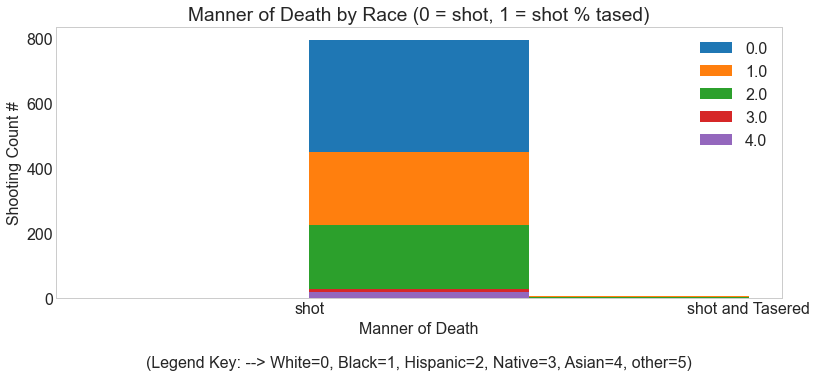

In [41]:
H0 = 'Manner of gun violence suspect is independent of race'
H1 = 'Manner of gun violence suspect is NOT independent of race'

# Gun Violence Attack to police
gun_violence_set.groupby(['enc_race']).manner_of_death.hist(legend = True, bins = 2, grid = False)
plt.title('Manner of Death by Race (0 = shot, 1 = shot % tased)')
plt.xlabel('Manner of Death\n\n(Legend Key: --> White=0, Black=1, Hispanic=2, Native=3, Asian=4, other=5)')
plt.ylabel('Shooting Count #')
None

#### Manner of death of gun violence suspects:
    
- 55.64 % of all suspects likely to be just shot only
- 0.7% of all suspects likely to be tased and then shot.
- Majority of gun violence victims (98.7%) were shot without being tased first. Police escalated the use of their weapons in these incidents.


#### Variation among race with respect to manner of death(Shot only or tased then shot)

In [42]:
# Create html table
data = [["MANNER OF DEATH PATTERNS","VALUE PERCENT",'%'],
        ["Caucasians", 65.24,'%'],
         ["Black American",36.47,'%'],
         ["Hispanics American",18.64,'%'],
         ["Native American",2.35,'%'],
         ["Asian American",1.62,'%'],
         ["Other Ethnics",0.81,'%']
         ]
table = tabulate.tabulate(data, tablefmt='html')
table

MANNER OF DEATH PATTERNS,VALUE PERCENT,%
Caucasians,65.24,%
Black American,36.47,%
Hispanics American,18.64,%
Native American,2.35,%
Asian American,1.62,%
Other Ethnics,0.81,%


-----------------
### (Q- V). With gun violence, are fleeing suspects more likely to be shot based on race?


#### Chich group is likely to be shot by fleeing law enforment?

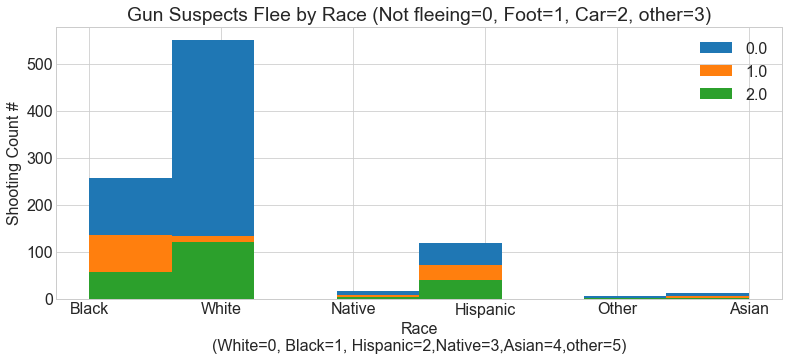

In [43]:
H0 = 'Fleeing of gun violence suspects is independent of race'
H1 = 'Fleeing of gun violence suspect is NOT independent of race'

# Gun Violence Attack to police
gun_violence_set.groupby(['enc_flee']).race.hist(stacked = False, legend = True, bins = 8)
plt.title('Gun Suspects Flee by Race (Not fleeing=0, Foot=1, Car=2, other=3)')
plt.xlabel('Race\n(White=0, Black=1, Hispanic=2,Native=3,Asian=4,other=5)')
plt.ylabel('Shooting Count #')
None

In [44]:
# Create html table
data = [["ALL RACES FLEE PATTERNS","VALUE PERCENT",'%'],
    ["Not Fleeing Suspects", 35.23,'%'],
        ["Flee by Foot",13.00,'%'],
        ["Flee by Car",8.14,'%'],
         ]
table = tabulate.tabulate(data, tablefmt='html')
table

ALL RACES FLEE PATTERNS,VALUE PERCENT,%
Not Fleeing Suspects,35.23,%
Flee by Foot,13.0,%
Flee by Car,8.14,%


### Chi^2 T-test result:
  - Gun related suspects fleeing from police is not independent of race. In other words, race factors are vital in increasing the likelihood of being shot by factoring fleeing tendencies.

### Hypothesis Summary:
- __Non-fleeing:__
    - white population is more likely to be shot that any other race, followed by Hispanics
- __Fleeing by foot:__
    - Still a good proportion of white Americans are likely to be shot by fleeing police, followed by black Americans and lastly Hispanic Americans
- __Fleeing By Car:__
    - Hispanics and white Americans are likely to be shot at almost same proportions is fleeing by motor vehicle unlike African American counterparts.

# Modeling 

#### Acquire modeling Data & create X and Y variables (target is gun violence)

In [84]:
# split into modeling train, validate, test
train, validate, test = import_libraries.prepare_modeling_data(target = 'gun_violence',seed = 123)
# create X & y version of train, where y is a series with just the target variable and X are all the features. 
X_train = train.drop(columns=['gun_violence'])
y_train = train.gun_violence
X_validate = validate.drop(columns=['gun_violence'])
y_validate = validate.gun_violence
X_test = test.drop(columns=['gun_violence'])
y_test = test.gun_violence

### Establish Baseline

In [114]:
# Get value 
baseline = (len(train[train.gun_violence == 1]) / len(train.gun_violence))
baseline

0.5637093829864914

### Model 1: Decision Trees

In [57]:
# Train the model
clf = import_libraries.DecisionTreeClassifier(max_depth=3, random_state=123)
# Fit the model
clf = clf.fit(X_train, y_train)
# Predict
y_pred = clf.predict(X_train)
# Predict probability
y_pred_proba = clf.predict_proba(X_train)
print(import_libraries.classification_report(y_train, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1195
           1       1.00      1.00      1.00      1544

    accuracy                           1.00      2739
   macro avg       1.00      1.00      1.00      2739
weighted avg       1.00      1.00      1.00      2739



#### Validate Sample

In [59]:
# Produce y_predictions that come from the X_validate
y_pred = clf.predict(X_validate)
print(import_libraries.classification_report(y_validate, y_pred))                     

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       504
           1       1.00      1.00      1.00       671

    accuracy                           1.00      1175
   macro avg       1.00      1.00      1.00      1175
weighted avg       1.00      1.00      1.00      1175



### Model 2: Random Forest

In [65]:
# Create the object
rf = import_libraries.RandomForestClassifier(bootstrap = True, class_weight = None,criterion = 'gini',
                            min_samples_leaf = 3,n_estimators = 100,max_depth = 3,random_state = 123)
# Fit the model 
rf.fit(X_train, y_train)
# Predict
y_pred = rf.predict(X_train)
# Classification report
print(import_libraries.classification_report(y_train, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1195
           1       1.00      1.00      1.00      1544

    accuracy                           1.00      2739
   macro avg       1.00      1.00      1.00      2739
weighted avg       1.00      1.00      1.00      2739



### Model 3: K-Nearest Neighbor

In [72]:
# Create object
knn = import_libraries.KNeighborsClassifier(n_neighbors=5, weights='uniform')
# Fit model
knn.fit(X_train, y_train)
# Predict
y_pred = knn.predict(X_train)
# Estimate probability
y_pred_proba = knn.predict_proba(X_train)
# Classification Report
print(import_libraries.classification_report(y_train, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.97      0.98      1195
           1       0.98      1.00      0.99      1544

    accuracy                           0.99      2739
   macro avg       0.99      0.98      0.99      2739
weighted avg       0.99      0.99      0.99      2739



### Model 4: Logistic Regression

In [116]:
# Create object
logit = import_libraries.LogisticRegression(C = 1, class_weight = {0:1, 1:99}, random_state = 123, intercept_scaling = 1, solver = 'lbfgs')
# Fit model
logit.fit(X_train, y_train)
# Predict
y_pred = logit.predict(X_train)
# Estimate probability
y_pred_proba = logit.predict_proba(X_train)
# Classification Report
print(import_libraries.classification_report(y_train, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1195
           1       1.00      1.00      1.00      1544

    accuracy                           1.00      2739
   macro avg       1.00      1.00      1.00      2739
weighted avg       1.00      1.00      1.00      2739



### Evaluate Best Model
##### Accuracy on Validate sets:

   - Decision Tree - 1.0
   - Random Forest- 1.0 (More Accurate Model)
   - KNN - 0.97
   - Logistic Regression - 1.0
    
##### NOTE: Logistic regression presumes predictors are independent of each other. In our case, we find gun violence is not independent of race. Therefore we will drop LS and KNN and choose best model from Decision Tree and Random Forest classifications models. 

##### Since Random Forest is more accurate than Decision tree, we will adopt Random Forest model to test on our test set.
    

In [121]:
print(f'Random Forest Accuracy on test set: {rf.score(X_test, y_test)}\nBaseline Accuracy {baseline}')

Random Forest Accuracy on test set: 0.9989785495403473
Baseline Accuracy 0.5637093829864914


# Conclusion 

Race is a vital component to gun violence. Crimes analyzed in this project shows that white community appears to be the most <i>vindicated</i> group when it comes to gun violence. However this is inconclusive and with more time I would like to explore further as the proportion of Caucasian Americans in this dataset is 50.71% of the overall population. Gun violence on the other hand is undisputed to be a category that contribute to most incidents of police shootings in America. This project deducted that gun crimes alone accounted for 56.37% of all violent crimes in America (through this dataset) from January 2014 - June, 2020.

Contrary to the public opinion on race, the black community is the second most 'shot and killed' community in gun related police incidents after the Caucasian community accounting for 26.91% - Almost half the percentage of white community. Hispanic community came third at 17.56% and Asian and Native Americans accounting for 2.04% and 1.86% respectively.

Four Models were analyzed in this project with purpose to create a generalized pattern in gun violence:
    
    - Decision Trees
    - Random Forest
    - K-Nearest Neighbor 
    - Linear Regression.
    
Best model with higher accuracy of prediction, in our case- gun violence, was Random Forest. Our observed baseline accuracy was 56.37% and our model predicted gun violence with an accuracy of 99.90%. (Racial factor components will be analyzed in future iterations with these models).
** Not iterations made with other features at this time



# Recommendations

Contrary to popular mainstream media, black community is not adversely killed community in America due to gun violence. Statistics show the white community is the most affected community. I will caution however, more analysis need to be done on this dataset.  

## Next Steps


This topic is by no means complete. In fact more information can still be deducted from this dataset. Examples include location factors (city, state) of gun violence and how they differ, the age of the victim/ suspect, how gender factors are in combinations with other factors(gender dis proportionally vary with gun violence. Over 95% of all gun violence incidents are perpetrated by male suspects).

With more data, we can examine factors such as proximity to social institutions like schools and public places as these places have experienced a lot of attentions in the media lately. Lastly, social-economic factors of the perpetrators as well as police shooting incidents histories would be beneficial in exploring further development in this important topic.